# Day 14
## Puzzle 1

In [30]:
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib inline

In [31]:
input_file = 'input_1.txt'
# input_file = 'test_input_1.txt'

Read the robots starting positions and velocities.

In [32]:
with open(file=input_file, mode="r") as file:
    robot_positions_and_velocities = []
    
    for line in file:
        values = re.findall(r'[-+]?(?:\d+)', line)  
        formatted_values = []
        
        for value in values:
            if value.startswith('-'):
                formatted_values.append(-int(value.split('-')[-1]))

            else:
                formatted_values.append(int(value))

        position = np.array(formatted_values[:2])
        velocity = np.array(formatted_values[2:])
        robot_positions_and_velocities.append((position, velocity))

In [33]:
robot_positions_and_velocities[:10]

[(array([ 7, 85]), array([-65, -36])),
 (array([ 4, 17]), array([-37, -76])),
 (array([60, 71]), array([ -8, -19])),
 (array([82, 99]), array([ 20, -59])),
 (array([56, 11]), array([ 50, -21])),
 (array([20, 25]), array([66, 12])),
 (array([57, 97]), array([-67, -20])),
 (array([89, 37]), array([10, 52])),
 (array([32, 51]), array([46, 56])),
 (array([72, 40]), array([ 26, -80]))]

Calculate the robots positions after 100 seconds.

In [34]:
seconds = 100
room_width = 101
room_length = 103

if input_file.startswith('test'):
    room_width = 11
    room_length = 7

width_divider = room_width // 2
length_divider = room_length // 2
quadrant_count = np.array([0, 0, 0, 0])

for position, velocity in robot_positions_and_velocities:
    updated_robot_position = position + seconds*velocity
    updated_robot_position[0] = updated_robot_position[0] % room_width
    updated_robot_position[1] = updated_robot_position[1] % room_length
    left = False
    upper = False

    if updated_robot_position[0] < width_divider:
        left = True

    elif updated_robot_position[0] == width_divider:
        continue

    if updated_robot_position[1] < length_divider:
        upper = True

    elif updated_robot_position[1] == length_divider:
        continue

    if left and upper:
        quadrant_count[0] += 1

    elif left and not upper:
        quadrant_count[1] += 1

    elif not left and upper:
        quadrant_count[2] += 1

    elif not left and not upper:
        quadrant_count[3] += 1

safety_factor = np.prod(quadrant_count)

In [35]:
int(safety_factor)

228410028

## Puzzle 2

First, we plot some of the iterations to see if any patterns show up.

In [36]:
seconds = 200
room_width = 101
room_length = 103

if input_file.startswith('test'):
    room_width = 11
    room_length = 7

robot_positions_at_second = {second: [] for second in range(1, seconds + 1)}

for position, velocity in robot_positions_and_velocities:
    for second in range(1, seconds + 1):
        updated_robot_position = position + second*velocity
        updated_robot_position[0] = updated_robot_position[0] % room_width
        updated_robot_position[1] = updated_robot_position[1] % room_length
        robot_positions_at_second[second].append(updated_robot_position)

MovieWriter ffmpeg unavailable; using Pillow instead.


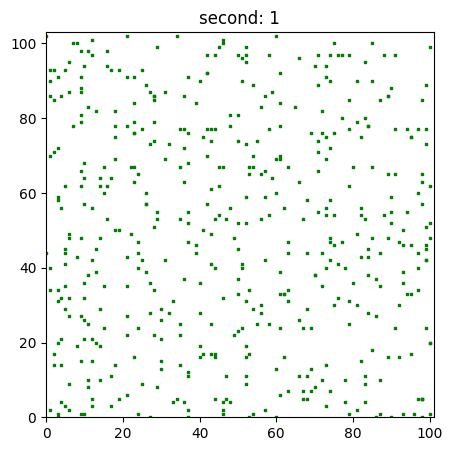

In [37]:
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(xlim=(0, room_width), ylim=(0, room_length))
x = [0]
y = [0]
scatter_plot = ax.scatter(x, y, s=2, c='green', marker='s')
second = 0

def update(frame):
    x = [robot_position_at_second[0] for robot_position_at_second in robot_positions_at_second[frame + 1]]
    y = [robot_position_at_second[1] for robot_position_at_second in robot_positions_at_second[frame + 1]]
    data = np.stack([x, y]).T
    ax.set_title(f'second: {frame + 1}')
    scatter_plot.set_offsets(data)
    return scatter_plot, 

anim = animation.FuncAnimation(fig, update, frames=seconds, interval=100)
anim.save(filename='robot_movement.gif')

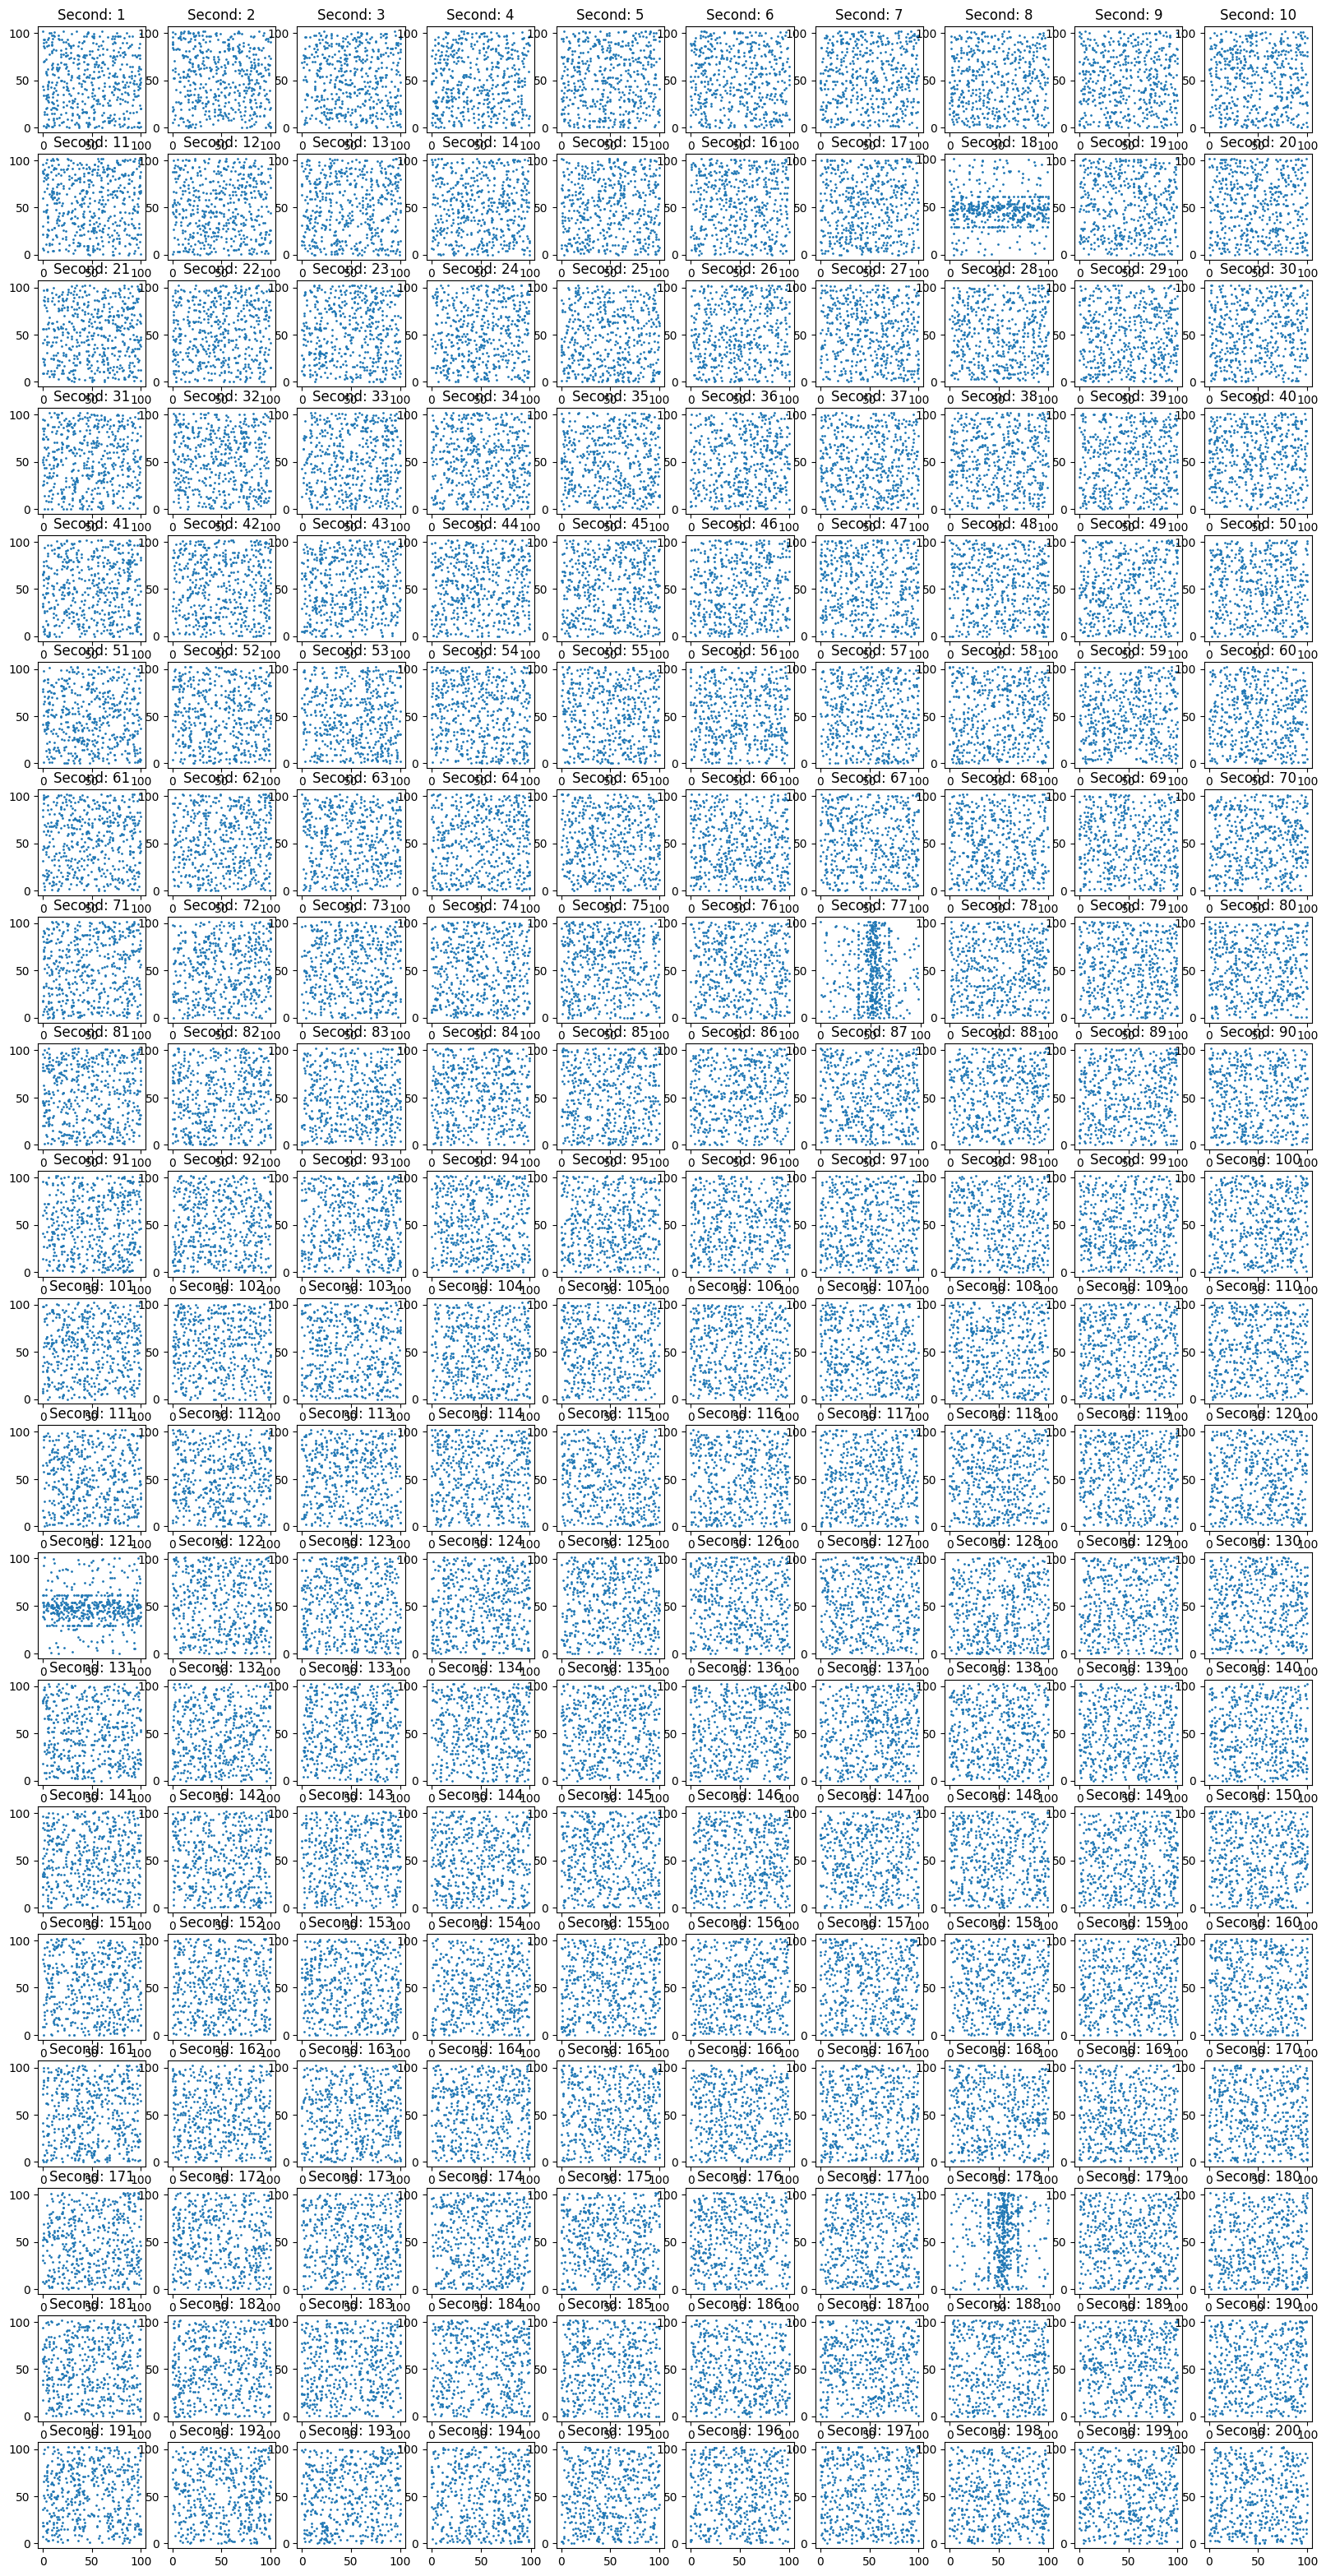

In [38]:
plt.figure(figsize=(20, 80))

for second in range(1, seconds + 1):
    x = [robot_position_at_second[0] for robot_position_at_second in robot_positions_at_second[second]]
    y = [robot_position_at_second[1] for robot_position_at_second in robot_positions_at_second[second]]
    plt.subplot(40, 10, second)
    plt.title(f'Second: {second}')
    plt.scatter(x, y, s=1)

Horizontal stripes appear at seconds $18 + 103m, m = 0, 1, 2, ...$ and vertical lines appear at $77 + 101n, n = 0, 1, 2, ...$. Perhaps, there will be a christmas tree where $18 + 103m = 77 + 101n$? $m = 80, n = 81$ results in $8258$ in both the right-hand side and the left-hand side.

In [39]:
seconds = 10000
room_width = 101
room_length = 103

if input_file.startswith('test'):
    room_width = 11
    room_length = 7


special_seconds = [s for s in range(77, seconds, 101)] + [s for s in range(18, seconds, 103)]
robot_positions_at_second = {s: [] for s in sorted(special_seconds)}

for position, velocity in robot_positions_and_velocities:
    for second in robot_positions_at_second.keys():
        updated_robot_position = position + second*velocity
        updated_robot_position[0] = updated_robot_position[0] % room_width
        updated_robot_position[1] = updated_robot_position[1] % room_length
        robot_positions_at_second[second].append(updated_robot_position)

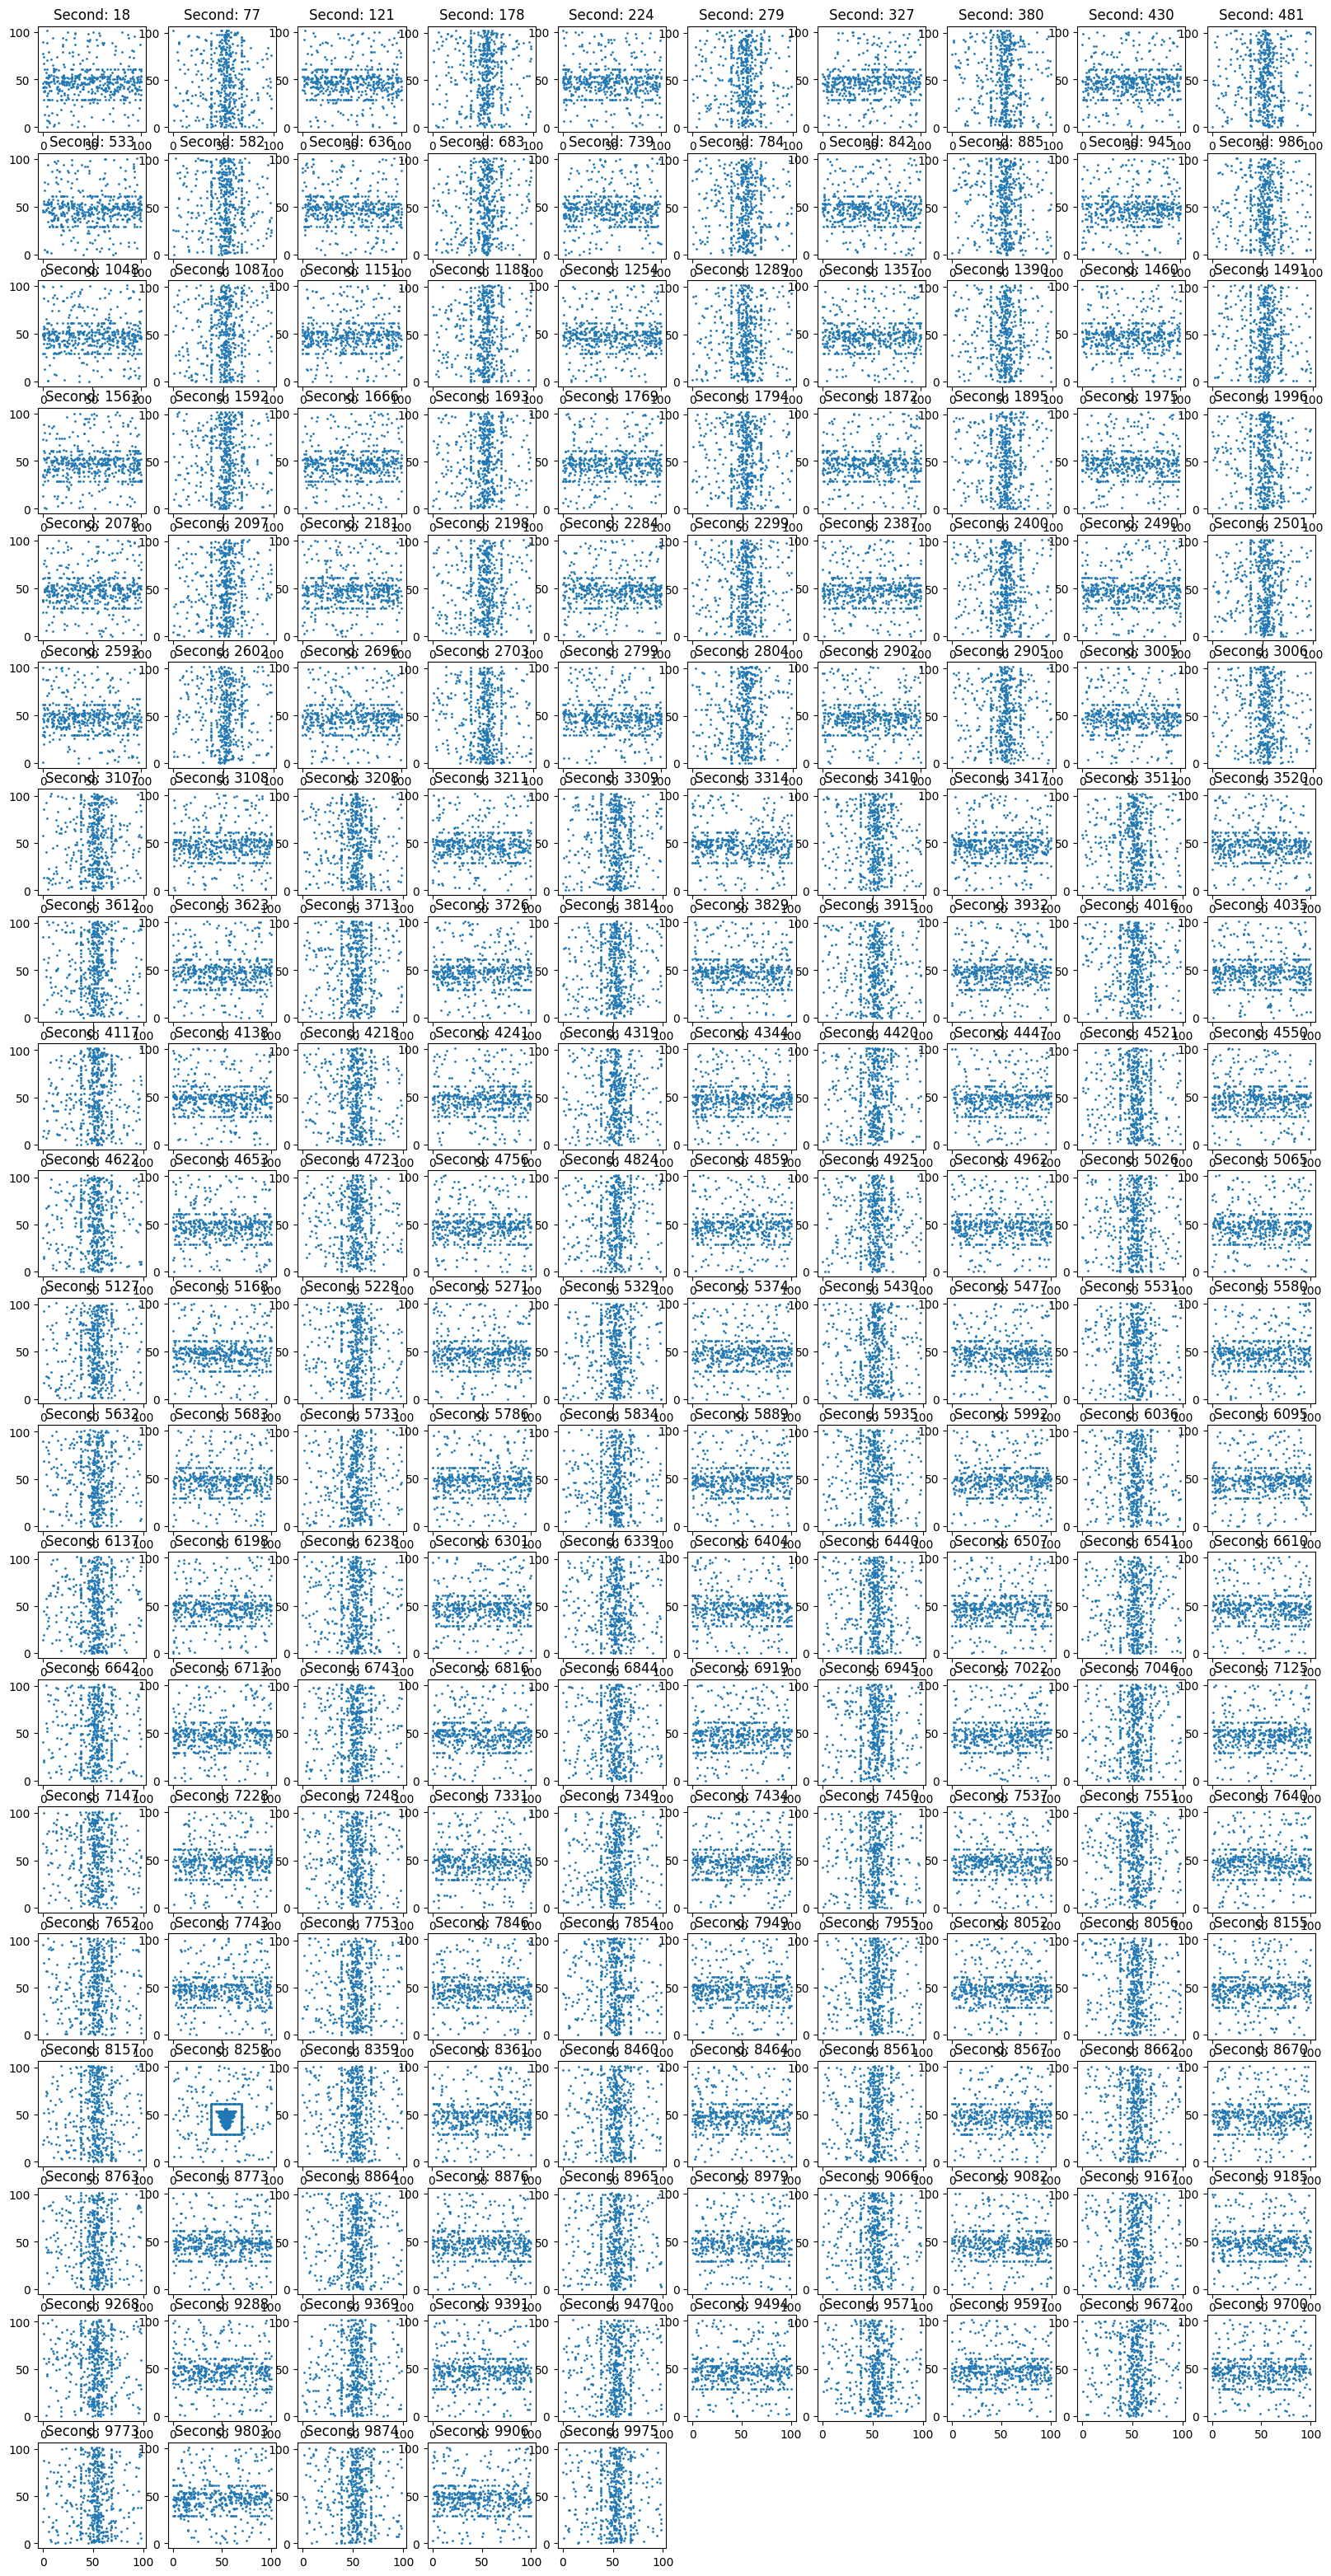

In [40]:
plt.figure(figsize=(20, 160))

for i, second in enumerate(robot_positions_at_second.keys(), start=1):
    x = [robot_position_at_second[0] for robot_position_at_second in robot_positions_at_second[second]]
    y = [robot_position_at_second[1] for robot_position_at_second in robot_positions_at_second[second]]
    plt.subplot(80, 10, i)
    plt.title(f'Second: {second}')
    plt.scatter(x, y, s=1)